**TensorFlow - MNIST Dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set
of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0


In [4]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(keras.__version__)

2.2.4-tf


In [6]:
mnist = keras.datasets.fashion_mnist

In [7]:
type(mnist)

module

In [8]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()  ## using as tuple to store train and test data

**Exploratory Data Analysis (EDA)**

In [22]:
print("X_train:",X_train.shape)  ### Displaying no of rows and column
print("Y_train:",Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


In [23]:
print("X_train max:",np.max(X_train))  ## Displaying maximum of array elements
print("X_test max:", np.max(X_test))
print("Y_train max:", np.max(Y_train))
print("Y_test max:", np.max(Y_test))

X_train max: 1.0
X_test max: 1.0
Y_train max: 9
Y_test max: 9


In [11]:
Y_train  ## It contains 10 items which are assigned from 0 to 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
Y_test  ## It contains 10 items

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [13]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] \
## Labeling the items

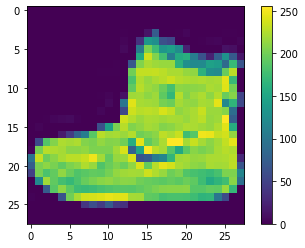

In [15]:
plt.figure()    ## display ankle boot
plt.imshow(X_train[0])
plt.colorbar()

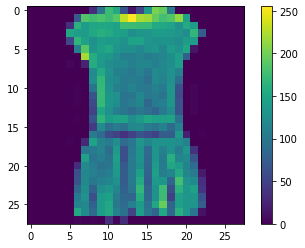

In [16]:
plt.figure()   ## display Top
plt.imshow(X_train[3])
plt.colorbar()

The pixel value lies from 0 to 255, since Neural Network only takes values from 0 to 1 so we have to divide it by 255

In [18]:
X_train = X_train/255.0

In [19]:
X_test = X_test/255.0

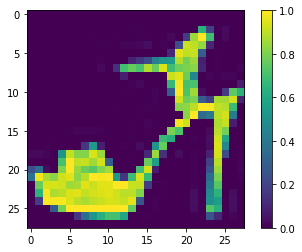

In [21]:
plt.figure()   ## Now the pixel is from 0 to 1.
plt.imshow(X_train[9])
plt.colorbar()

In [24]:
## Building the model with TF2.0
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense 

In [25]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))##Flatten converts the multidimensional pixel into1D array to be fitted to denselayer
model.add(Dense(128, activation = 'relu'))  ## 128 neurons 
model.add(Dense(10, activation = 'softmax')) ## 10 output layer

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Model Compilation we have to do 3 steps**

1. Loss Function
2. Optimizer
3. Metrics

In [28]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
model.fit(X_train,Y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.4949 - accuracy: 0.8263
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3774 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3355 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3105 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2944 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2796 - accuracy: 0.8979
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2676 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2572 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2474 - accuracy: 0.9072
Epoch 10/

In [30]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = model.predict_classes(X_test)

In [34]:
accuracy_score(Y_test, y_pred)

0.8673

In [35]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [36]:
pred = model.predict(X_test)

In [42]:
pred.shape  ## It has 10000 rows and 9 columns

(10000, 10)

In [43]:
pred[9]  ## displaying the 10th element

array([6.7960656e-08, 4.5723255e-11, 2.1728386e-10, 8.9249129e-12,
       3.0766532e-08, 4.2364062e-04, 2.9408724e-09, 9.9917102e-01,
       2.3982363e-07, 4.0502794e-04], dtype=float32)

In [39]:
np.argmax(pred[9])  ## determining the highest prediction score

7